In [1]:
remotes::install_github("peeter-t2/digar.txts",lib="R_pckg/",upgrade="never")
library(digar.txts,lib.loc="R_pckg/")

* checking for file ‘/tmp/Rtmp1XVjkN/remotesfb6878c2635d/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



Loading required package: data.table



In [2]:
library(tidyverse)
install.packages('tidytext', lib='~/R_pckg')
library(tidytext, lib.loc='~/R_pckg')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [3]:
all_issues <- get_digar_overview()

[1] "Issue metadata read"


In [4]:
valiseesti_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti" | keyid=="eestipost" | keyid=="vabaeestlane" | keyid=="vabaeestisona" | keyid=="meiekodu" | keyid=="voitleja")

In [5]:
head(valiseesti_ajalehed, 5)

DocumentID,keyid,attrs,DocumentDate,DocumentTitle,DocumentType,series,DocumentNumber,DocumentVolume,pages,⋯,n_pages,n_articles_lemmas,n_pages_lemmas,n_articles_metadata,n_pages_metadata,pages_exist,sections_exist,decade,zippath_pages_meta,zippath_sections_meta
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<lgl>,<lgl>,<int>,<chr>,<chr>
eestipost19451106,eestipost,1,6 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,
eestipost19451110,eestipost,2,10 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,8,NA,8,0,8,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,
eestipost19451113,eestipost,3,13 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,
eestipost19451115,eestipost,4,15 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,
eestipost19451117,eestipost,5,17 november 1945,Eesti Post = Estonian Post : Estonian Newspaper,NEWSPAPER,staging/all_pubs/all_vols_eestipost.xml,,,staging/all_pubs/all_vols_eestipost.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestipost/eestipost_1940_pages_meta.zip,


In [6]:
searchterm <- "balti"
searchfile <- "balti_lemmad.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, valiseesti_ajalehed, searchtype="lemmas", source="pages")

In [7]:
texts1 <- fread("balti_lemmad.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts1[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta <- texts1 %>% select(id, DocumentID) %>% left_join(valiseesti_ajalehed %>% select(keyid,year,month,DocumentID, zippath_sections,zippath_pages),by=c("DocumentID"))

In [8]:
valiseesti_aastad_balti <- fileids_w_meta %>% 
  count(year) %>% mutate(set="balti")

In [9]:
colnames(valiseesti_aastad_balti)[2]  <- "esinemisi_kokku"

In [10]:
subset_meta <- get_subset_meta(valiseesti_ajalehed, source="pages")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/Rtmp1XVjkN/filefb6867719dce' has size 0. Returning a NULL data.table.”


In [11]:
subset_wordcounts <- subset_meta %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [12]:
head(subset_wordcounts, 5)

year,words
<int>,<int>
1944,212175
1945,1711519
1946,3156818
1947,5109892
1948,5112470


In [13]:
colnames(subset_wordcounts)[2]  <- "sonu_kokku"

In [14]:
rootsi_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [15]:
searchfile <- "balti_lemmad_rootsi.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed, searchtype="lemmas", source="pages")

In [16]:
texts2 <- fread("balti_lemmad_rootsi.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts2[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta2 <- texts2 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [17]:
rootsi_aastad_balti <- fileids_w_meta2 %>% 
  count(year) %>% mutate(set="balti")

In [18]:
subset_meta2 <- get_subset_meta(rootsi_ajalehed, source="pages")

In [19]:
subset_wordcounts2 <- subset_meta2 %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [20]:
head(subset_wordcounts2, 5)

year,words
<int>,<int>
1944,212175
1945,1661642
1946,2286172
1947,3640298
1948,3720132


In [21]:
colnames(rootsi_aastad_balti)[2]  <- "esinemisi_kokku_rootsi"
colnames(subset_wordcounts2)[2]  <- "sonu_kokku_rootsi"

In [22]:
kanada_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="vabaeestlane" | keyid=="voitleja")

In [23]:
searchfile <- "balti_lemmad_kanada.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, kanada_ajalehed, searchtype="lemmas", source="pages")

In [24]:
texts3 <- fread("balti_lemmad_kanada.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts3[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta3 <- texts3 %>% select(id, DocumentID) %>% left_join(kanada_ajalehed %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [25]:
kanada_aastad_balti <- fileids_w_meta3 %>% 
  count(year) %>% mutate(set="balti")

In [26]:
subset_meta3 <- get_subset_meta(kanada_ajalehed, source="pages")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/Rtmp1XVjkN/filefb687e073fa2' has size 0. Returning a NULL data.table.”


In [27]:
subset_wordcounts3 <- subset_meta3 %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [28]:
head(subset_wordcounts3, 5)

year,words
<int>,<int>
1952,1389121
1953,1631876
1954,1722077
1955,1760442
1956,1719398


In [29]:
colnames(kanada_aastad_balti)[2]  <- "esinemisi_kokku_kanada"
colnames(subset_wordcounts3)[2]  <- "sonu_kokku_kanada"

In [30]:
usa_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="vabaeestisona")

In [31]:
searchfile <- "balti_lemmad_usa.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, usa_ajalehed, searchtype="lemmas", source="pages")

In [32]:
texts4 <- fread("balti_lemmad_usa.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts4[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta4 <- texts4 %>% select(id, DocumentID) %>% left_join(usa_ajalehed %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [33]:
usa_aastad_balti <- fileids_w_meta4 %>% 
  count(year) %>% mutate(set="balti")

In [34]:
subset_meta4 <- get_subset_meta(usa_ajalehed, source="pages")

In [35]:
subset_wordcounts4 <- subset_meta4 %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [36]:
head(subset_wordcounts4, 5)

year,words
<int>,<int>
1949,259930
1950,760216
1951,925559
1952,1077164
1953,1251404


In [37]:
colnames(usa_aastad_balti)[2]  <- "esinemisi_kokku_usa"
colnames(subset_wordcounts4)[2]  <- "sonu_kokku_usa"

In [38]:
graafik1 <- valiseesti_aastad_balti %>% 
  left_join(subset_wordcounts,by="year") %>%
  left_join(rootsi_aastad_balti, by="year") %>%
  left_join(subset_wordcounts2,by="year") %>%
  left_join(kanada_aastad_balti, by="year") %>%
  left_join(subset_wordcounts3,by="year") %>%
  left_join(usa_aastad_balti, by="year") %>%
  left_join(subset_wordcounts4,by="year")

In [39]:
graafik = subset(graafik1, select = -c(set.x,set.y,set.x.x,set.y.y))

In [40]:
head(graafik, 20)

year,esinemisi_kokku,sonu_kokku,esinemisi_kokku_rootsi,sonu_kokku_rootsi,esinemisi_kokku_kanada,sonu_kokku_kanada,esinemisi_kokku_usa,sonu_kokku_usa
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1944,52,212175,52,212175,NA,NA,NA,NA
1945,441,1711519,423,1661642,NA,NA,NA,NA
1946,907,3156818,629,2286172,NA,NA,NA,NA
1947,984,5109892,618,3640298,NA,NA,NA,NA
1948,1195,5112470,850,3720132,NA,NA,NA,NA
1949,909,4269314,689,3191975,NA,NA,64,259930
1950,930,4358835,672,3187325,NA,NA,226,760216
1951,872,4016148,565,2927056,NA,NA,269,925559
1952,1213,5475485,566,2931415,320,1389121,306,1077164


Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5 row(s) containing missing values (geom_path).”


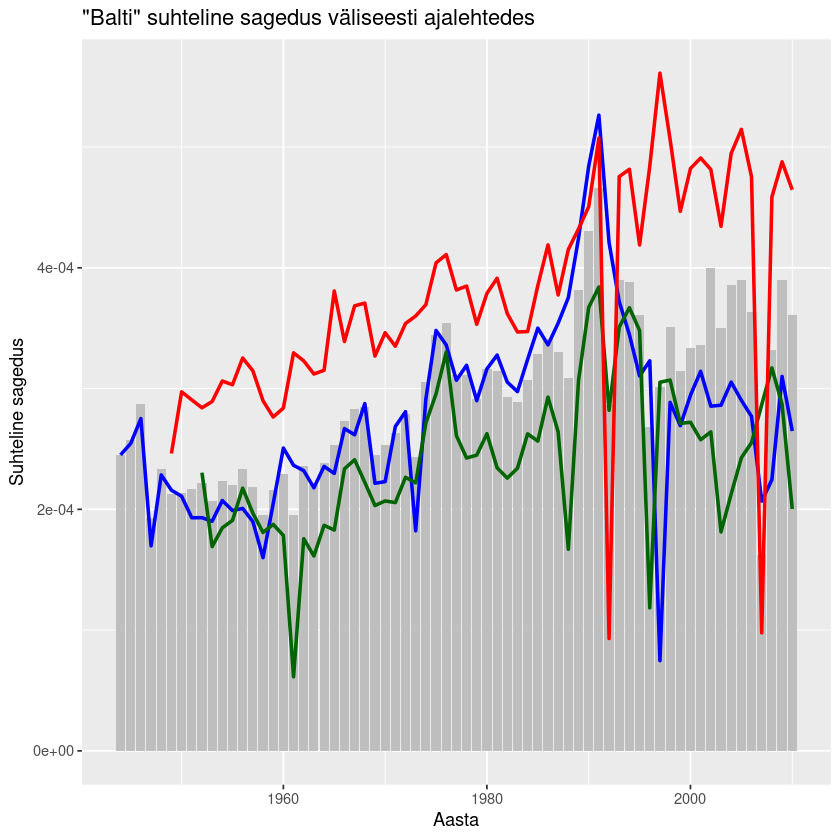

In [41]:
graafik %>%
  ggplot(aes(x=year,y=esinemisi_kokku/sonu_kokku)) +
  geom_bar(stat = "identity", fill = "gray") +
  geom_line(aes(x=year,y=esinemisi_kokku_rootsi/sonu_kokku_rootsi), stat = "identity", color = "blue", size = 1) +
  geom_line(aes(x=year,y=esinemisi_kokku_kanada/sonu_kokku_kanada), stat = "identity", color = "darkgreen", size = 1) +
  geom_line(aes(x=year,y=esinemisi_kokku_usa/sonu_kokku_usa), stat = "identity", color = "red", size = 1) +
  labs(x = "Aasta",
       y = "Suhteline sagedus",
       fill = "Lemmikjook",
       title = '"Balti" suhteline sagedus väliseesti ajalehtedes') +
  scale_color_manual(name = "Riik", values = c("Rootsi" = "blue", "Kanada" = "darkgreen", "USA" = "red"))

In [42]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [43]:
rootsi_ajalehed1 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1943&year<1961) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [44]:
searchfile <- "rootsi_ngrammid1.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed1, searchtype="lemmas", source="pages")

In [45]:
concs1 <- fread("rootsi_ngrammid1.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
concs1[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta_concs1 <- concs1 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed1 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [46]:
rootsi_concs1 <- get_concordances(searchterm=searchterm,texts=concs1,before=50,after=50,txt="lemmas",id="id")

In [47]:
rootsi_concs_4460 <- rootsi_concs1[, !c("id","nr","begin","end", "DocumentID")]

write.table(rootsi_concs_4460, "4460.txt", sep="\t", quote = F, row.names = F)

In [48]:
stopsonad <- read.table("estonian-stopwords-lemmas.txt", header = TRUE, sep = "\t", encoding = "UTF-8", stringsAsFactors = T)

In [49]:
head(stopsonad, 10)

,word
,<fct>
1,all
2,alla
3,allapoole
4,allpool
5,alt
6,altpoolt
7,eel
8,eespool
9,enne


In [50]:
bigrams_separated1 <- rootsi_concs_4460 %>%
  unnest_tokens(bigram, context, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

In [51]:
bigrams_filtered1 <- bigrams_separated1 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [52]:
# new bigram counts:
bigram_counts1 <- bigrams_filtered1 %>% 
  count(word1, word2, sort = TRUE)

In [53]:
head(bigram_counts1, 20)

word1,word2,n
<chr>,<chr>,<int>
balti,riik,4293
balti,rahvas,1836
balti,põgenik,1016
kolm,balti,628
balti,komitee,386
balti,ülikool,318
liidu,liidud,288
liidud,liit,266
balti,sakslane,250


In [54]:
bigram_graph1 <- bigram_counts1 %>%
  filter(n > 100) %>%
  graph_from_data_frame()

In [55]:
bigram_graph1

IGRAPH 070872a DN-- 34 29 -- 
+ attr: name (v/c), n (e/n)
+ edges from 070872a (vertex names):
 [1] balti   ->riik       balti   ->rahvas     balti   ->põgenik   
 [4] kolm    ->balti      balti   ->komitee    balti   ->ülikool   
 [7] liidu   ->liidud     liidud  ->liit       balti   ->sakslane  
[10] balti   ->meri       balti   ->pagulane   balti   ->maa       
[13] balti   ->humanist   balti   ->rahvus     humanist->ühing     
[16] baltiska->baltiskas  balti   ->saks       riik    ->küsimus   
[19] balt    ->balti      balti   ->küsimus    nõukogu ->nõukogude 
[22] riik    ->iseseisvus riik    ->esindaja   balti   ->vabariik  
+ ... omitted several edges

In [56]:
install.packages('ggraph', lib='~/R_pckg')
library(ggraph, lib.loc='~/R_pckg')

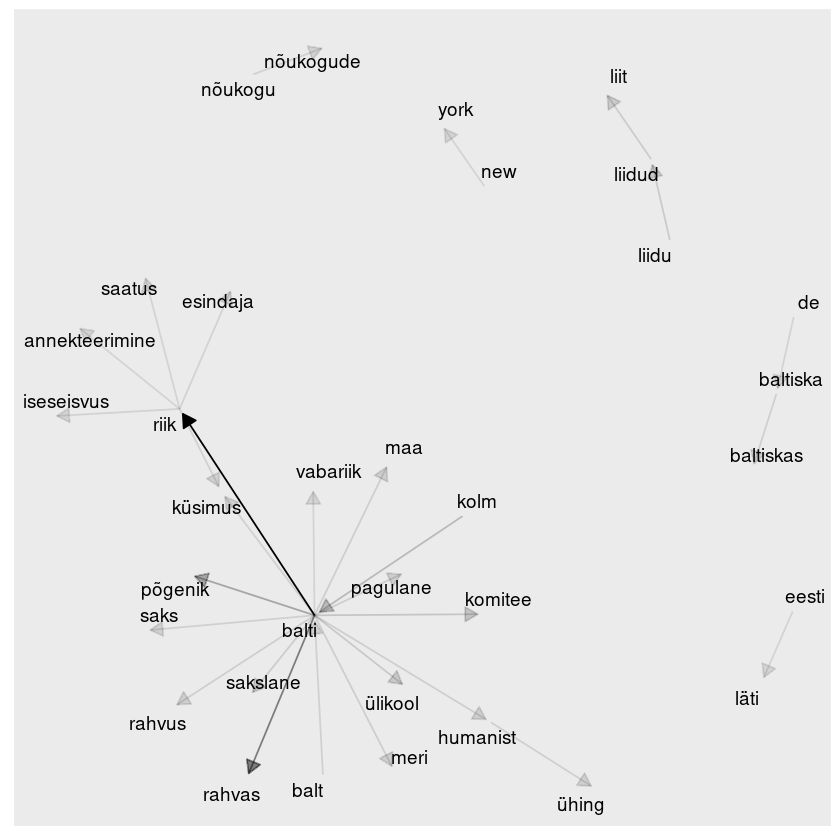

In [57]:
set.seed(2017)

a <- grid::arrow(type = "closed", length = unit(.12, "inches"))

ggraph(bigram_graph1, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches')) +
    #geom_node_point(color = "lightblue", size = 5) +
    geom_node_text(aes(label = name), repel = TRUE, size=4)

In [58]:
rootsi_ajalehed2 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1960&year<1985) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [59]:
searchfile <- "rootsi_ngrammid2.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed2, searchtype="lemmas", source="pages")

In [60]:
concs2 <- fread("rootsi_ngrammid2.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
concs2[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta_concs2 <- concs2 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed2 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [61]:
rootsi_concs2 <- get_concordances(searchterm=searchterm,texts=concs2,before=50,after=50,txt="lemmas",id="id")

In [62]:
rootsi_concs_6184 <- rootsi_concs2[, !c("id","nr","begin","end", "DocumentID")]

write.table(rootsi_concs_6184, "6184.txt", sep="\t", quote = F, row.names = F)

In [63]:
bigrams_separated2 <- rootsi_concs_6184 %>%
  unnest_tokens(bigram, context, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

In [64]:
bigrams_filtered2 <- bigrams_separated2 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [65]:
bigram_counts2 <- bigrams_filtered2 %>% 
  count(word1, word2, sort = TRUE)

In [66]:
head(bigram_counts2, 20)

word1,word2,n
<chr>,<chr>,<int>
balti,riik,5085
balti,rahvas,1842
balti,komitee,1382
baltiska,baltiskas,1285
balti,instituut,788
de,baltiska,775
kolm,balti,511
balti,organisatsioon,475
balti,küsimus,454


In [67]:
bigram_graph2 <- bigram_counts2 %>%
  filter(n > 100) %>%
  graph_from_data_frame()

In [68]:
bigram_graph2

IGRAPH d356abc DN-- 58 50 -- 
+ attr: name (v/c), n (e/n)
+ edges from d356abc (vertex names):
 [1] balti    ->riik           balti    ->rahvas        
 [3] balti    ->komitee        baltiska ->baltiskas     
 [5] balti    ->instituut      de       ->baltiska      
 [7] kolm     ->balti          balti    ->organisatsioon
 [9] balti    ->küsimus        liidu    ->liidud        
[11] liidud   ->liit           baltiskas->staterna      
[13] riik     ->küsimus        balti    ->arhiiv        
[15] balti    ->vabariik       balt     ->balti         
+ ... omitted several edges

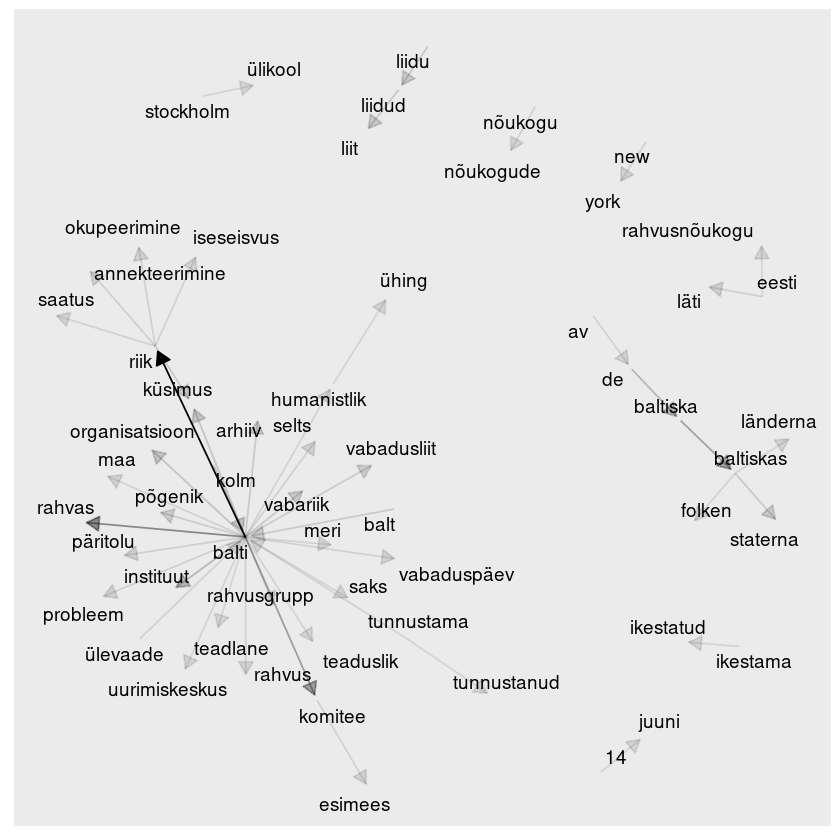

In [69]:
set.seed(2017)

a <- grid::arrow(type = "closed", length = unit(.12, "inches"))

ggraph(bigram_graph2, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches')) +
    geom_node_text(aes(label = name), repel = TRUE, size=4)

In [70]:
rootsi_ajalehed3 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1984&year<1996) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [71]:
searchfile <- "rootsi_ngrammid3.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed3, searchtype="lemmas", source="pages")

In [72]:
concs3 <- fread("rootsi_ngrammid3.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
concs3[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta_concs3 <- concs3 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed3 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [73]:
rootsi_concs3 <- get_concordances(searchterm=searchterm,texts=concs3,before=50,after=50,txt="lemmas",id="id")

In [74]:
rootsi_concs_8595 <- rootsi_concs3[, !c("id","nr","begin","end", "DocumentID")]

write.table(balti_concs_8595, "8595.txt", sep="\t", quote = F, row.names = F)

ERROR: Error in is.data.frame(x): object 'balti_concs_8595' not found


In [75]:
bigrams_separated3 <- rootsi_concs_8595 %>%
  unnest_tokens(bigram, context, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

In [148]:
bigrams_filtered3 <- bigrams_separated3 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [149]:
bigram_counts3 <- bigrams_filtered3 %>% 
  count(word1, word2, sort = TRUE)

In [150]:
head(bigram_counts3, 20)

word1,word2,n
<chr>,<chr>,<int>
balti,riik,3149
balti,rahvas,986
baltiska,baltiskas,594
kolm,balti,406
de,baltiska,349
balti,komitee,247
balti,küsimus,225
balt,balti,214
balti,instituut,212


In [151]:
bigram_graph3 <- bigram_counts3 %>%
  filter(n > 100) %>%
  graph_from_data_frame()

In [152]:
bigram_graph3

IGRAPH d8b6595 DN-- 21 18 -- 
+ attr: name (v/c), n (e/n)
+ edges from d8b6595 (vertex names):
 [1] balti    ->riik           balti    ->rahvas        
 [3] baltiska ->baltiskas      kolm     ->balti         
 [5] de       ->baltiska       balti    ->komitee       
 [7] balti    ->küsimus        balt     ->balti         
 [9] balti    ->instituut      balti    ->vabadusliit   
[11] liidud   ->liit           liidu    ->liidud        
[13] balti    ->arhiiv         baltiskas->staterna      
[15] balti    ->organisatsioon balti    ->vabariik      
+ ... omitted several edges

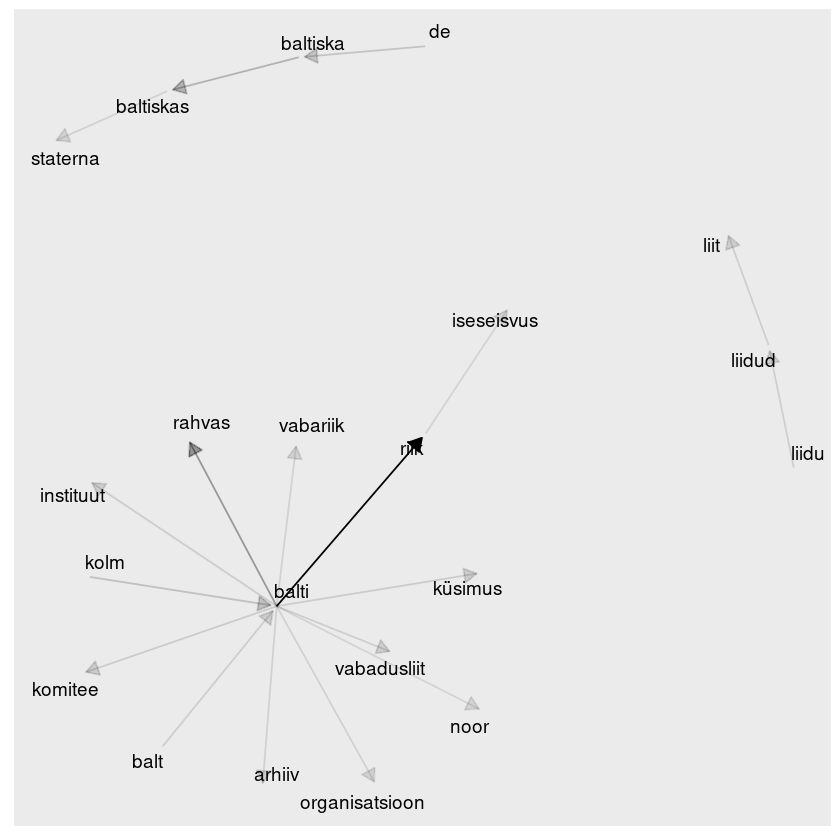

In [153]:
set.seed(2017)

a <- grid::arrow(type = "closed", length = unit(.12, "inches"))

ggraph(bigram_graph3, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches')) +
    geom_node_text(aes(label = name), repel = TRUE, size=4)